In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [267]:
dsc1 = np.array([[1.5, 2.5] , [1.5,2] , [2,2] , [1,2] , [1.5,1.5], [1,1], [1,2], [1,3], [1,4], [1,5]])
dsc1_classes = np.array([1,1,1,1,1,2,2,2,2,2])

dsc2 = np.array([[2,1], [2,2], [2,3], [2,4], [2,5], [1.4,1.4], [1.6,1.4], [1.6,1.2],[1.4,1.2], [1.5,1.3]])
dsc2_classes = np.array([1,1,1,1,1,2,2,2,2,2])

dsc3 = np.array([[1.5,2.5], [1.5, 2], [1.75, 2.25], [1.25, 2],[1.5,1.5], [1.5,5.5], [1.25, 5],[1.5,5],[1.15,5], [1.5,4.5]])
dsc3_classes = np.array([1,1,1,1,1,2,2,2,2,2])

In [268]:
def precision(query_class, retrieved, classes):
    tp = sum(classes[i] == query_class for i in retrieved)
    fp = len(retrieved) - tp
    precision = tp / (tp + fp)
    return precision

def recall(query_class, retrieved, classes):
    tp = sum(classes[i] == query_class for i in retrieved)        
    fn = 5 - tp
    recall =  tp / (tp + fn)
    return recall

def interpolated_precisions(precisions):
    for i in range(len(precisions)):
        max_p = precisions[i]
        for j in range(i+1, len(precisions)):
            if precisions[j] > max_p:
                max_p = precisions[j]
        precisions[i] = max_p
    

In [269]:
def distance(a,b):
    return np.linalg.norm(a-b)

In [274]:
def roc_curve(dsc, classes):

    roc_precisions = []
    roc_recalls = []
    n_items = len(dsc)
    # Increasing the recall: Retrieve from 1 to K similar items
    for k in range(n_items):
        mean_precision = 0
        mean_recall = 0
        # Euclidean distance for a point to all others
        for i in range(n_items):
            distances = []
            for j in range(n_items):
                distances.append(distance(dsc[i], dsc[j]))            
            retrieved = np.argpartition(distances, k)
            mean_recall += recall(classes[i], retrieved[:k+1], classes)
            mean_precision += precision(classes[i],retrieved[:k+1], classes)
        # Another ROC curve point calculated! Yay!
        mean_recall /= n_items
        mean_precision /= n_items
        roc_precisions.append(mean_precision)
        roc_recalls.append(mean_recall)
        if mean_recall == 1.0:
            break
    interpolated_precisions(roc_precisions)
    plt.plot(roc_recalls, roc_precisions, '--o')
    plt.xlabel("Recall")
    plt.ylabel("Interpolated Precision")
    plt.show()

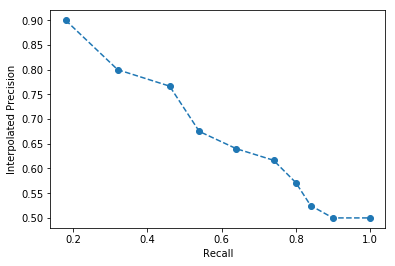

In [275]:
roc_curve(dsc1, dsc1_classes)

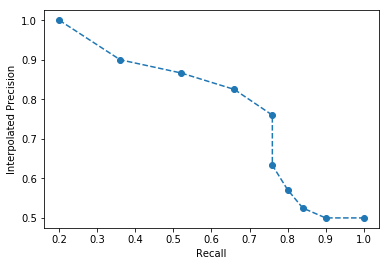

In [276]:
roc_curve(dsc2, dsc2_classes)

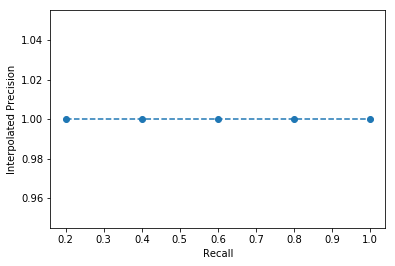

In [277]:
roc_curve(dsc3, dsc3_classes)